In [132]:
from fastai.vision.all import *
from fastai.data.all import *
from torchvision import datasets
from fastai.data.core import DataLoaders


In [13]:
train_dataset = datasets.FashionMNIST(root='data', train=True, download=True)
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True)

In [17]:
DataLoader(train_dataset, bs=46)

Init signature:
DataLoader(
    dataset=None,
    bs=None,
    num_workers=0,
    pin_memory=False,
    timeout=0,
    batch_size=None,
    shuffle=False,
    drop_last=False,
    indexed=None,
    n=None,
    device=None,
    persistent_workers=False,
    pin_memory_device='',
    *,
    wif=None,
    before_iter=None,
    after_item=None,
    before_batch=None,
    after_batch=None,
    after_iter=None,
    create_batches=None,
    create_item=None,
    create_batch=None,
    retain=None,
    get_idxs=None,
    sample=None,
    shuffle_fn=None,
    do_batch=None,
)
Docstring:      API compatible with PyTorch DataLoader, with a lot more callbacks and flexibility
File:           ~/.local/lib/python3.9/site-packages/fastai/data/load.py
Type:           type
Subclasses:     TfmdDL


In [46]:
Path(path+).exists()

True

In [47]:
Path(path+'/fashion-mnist_train.csv').exists()

True

In [42]:
path = './data'

In [48]:
mnist_train = pd.read_csv(path+'/fashion-mnist_train.csv')
mnist_test = pd.read_csv(path+'/fashion-mnist_train.csv')



In [49]:
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=lambda x: Image.fromarray(np.uint8(np.stack(np.rot90(x.iloc[1:].to_numpy().reshape((28,28)))*3,axis=-1))) 

In [ ]:
get_x

In [110]:
torch.tensor(mnist_train.iloc[3, 1:]).values

<function Tensor.values>

In [87]:
sample = np.reshape(mnist_train[mnist_train.columns[1:]].iloc[0].values/255, (28,28))

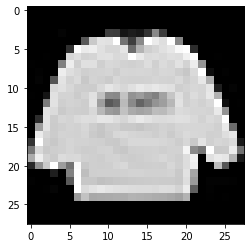

In [88]:
plt.figure()
plt.imshow(sample, 'gray')

In [124]:
Image.fromarray(np.uint8(np.stack(np.rot90(mnist_train.iloc[1,1:].to_numpy().reshape((28,28)))*3,axis=-1))) 

AttributeError: 'int' object has no attribute 'shape'

In [127]:
dls = DataLoaders()

In [129]:

train_loader = DataLoader(train_dataset, batch_size=256, 
                          shuffle=True, num_workers=1, pin_memory=True)

test_loader = DataLoader(test_dataset, batch_size=512,
                         shuffle=False, num_workers=1, pin_memory=True)

In [134]:
dls = DataLoaders(train_loader, test_loader)

In [138]:
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=False, n_out=1000, loss_func=nn.CrossEntropyLoss())

In [139]:
learn.fit_one_cycle(5, 5e-3)


epoch,train_loss,valid_loss,accuracy,time


AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 164, in create_batch
    try: return (fa_collate,fa_convert)[self.prebatched](b)
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 52, in fa_collate
    else type(t[0])([fa_collate(s) for s in zip(*t)]) if isinstance(b, Sequence)
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 52, in <listcomp>
    else type(t[0])([fa_collate(s) for s in zip(*t)]) if isinstance(b, Sequence)
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 53, in fa_collate
    else default_collate(t))
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/collate.py", line 183, in default_collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/_utils/fetch.py", line 39, in fetch
    data = next(self.dataset_iter)
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 138, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 168, in do_batch
    def do_batch(self, b): return self.retain(self.create_batch(self.before_batch(b)), b)
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 166, in create_batch
    if not self.prebatched: collate_error(e,b)
  File "/root/.local/lib/python3.9/site-packages/fastai/data/load.py", line 75, in collate_error
    if i == 0: shape_a, type_a  = item[idx].shape, item[idx].__class__.__name__
AttributeError: 'int' object has no attribute 'shape'
